<a href="https://colab.research.google.com/github/Durgagorrela/FMML_project_and_labs/blob/main/Project_Module4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### Project for Module: Perceptron and Gradient Descent

NOTE: YOU NEED TO WRITE CODE IN CELLS THAT SPECIFICALLY MENTION TASK-1, TASK-2, etc.

WRITE ANY OBSERVATION(S), IF REQUIRED BY THE TASK, IN A SEPARATE CELL AT THE BOTTOM OF THE NOTEBOOK.  

---

# Notebook Imports and Packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [ ]:
def f(x):
    return x ** 2 + x + 1

In [ ]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

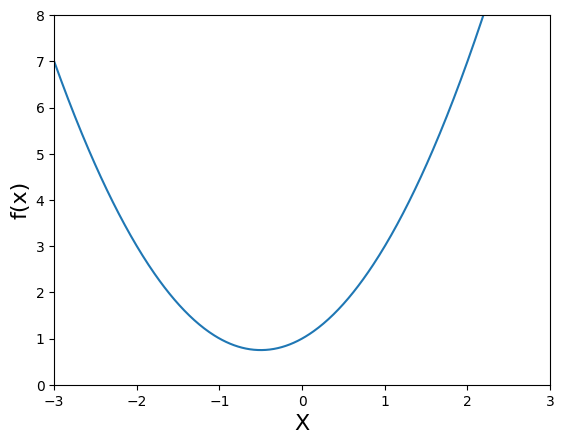

In [ ]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [ ]:
def df(x):
    return 2 * x + 1

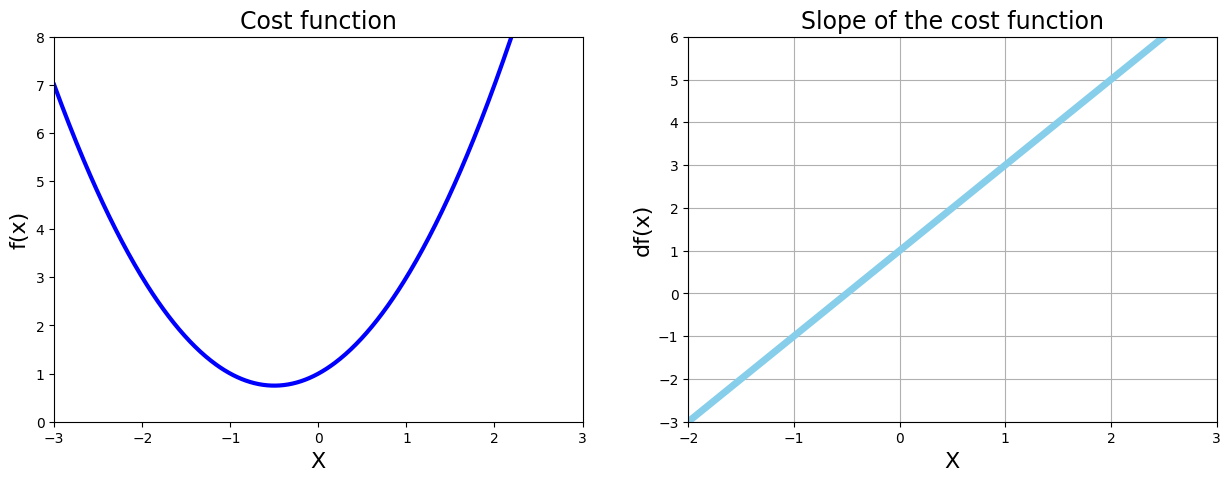

In [ ]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent

In [ ]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # Calculate the gradient at the current point
    new_x = previous_x - step_multiplier * gradient  # Update the new_x using the gradient descent formula

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


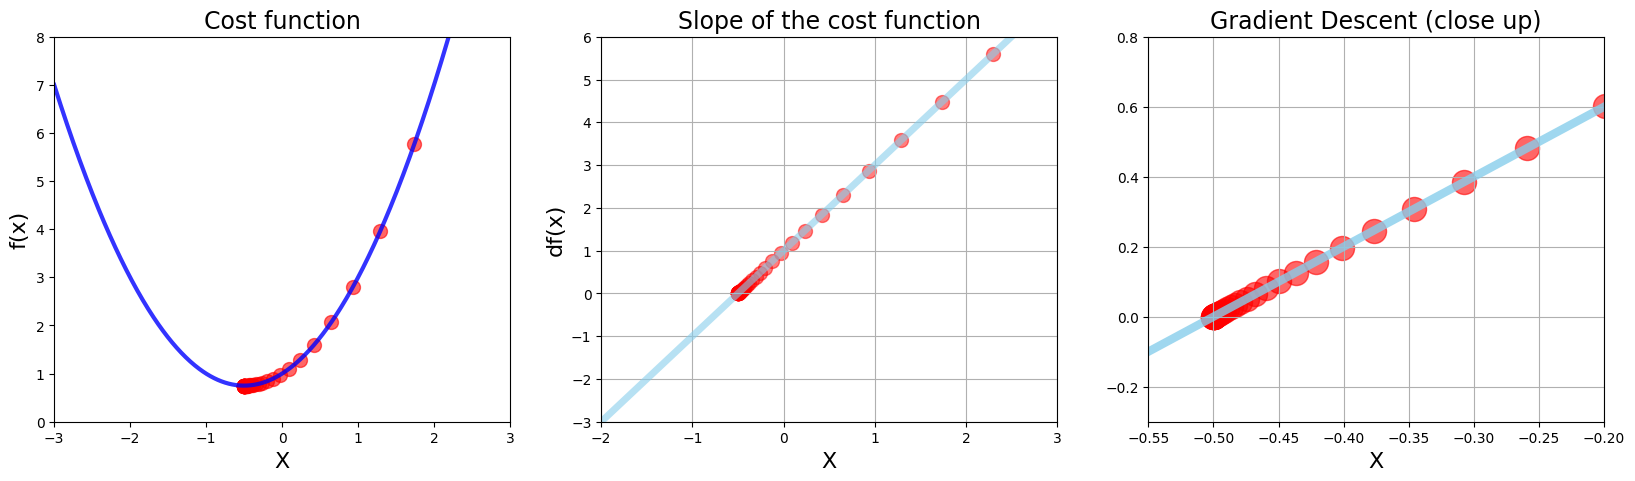

In [ ]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [ ]:


## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

#answer#
import numpy as np

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**3 - 2*x**2 + 2

def dg(x):
    return 3*x**2 - 4*x  # Derivative of g(x) with respect to x


In [ ]:
## TASK-3 : Plot function and derivative side by side like has been done earlier

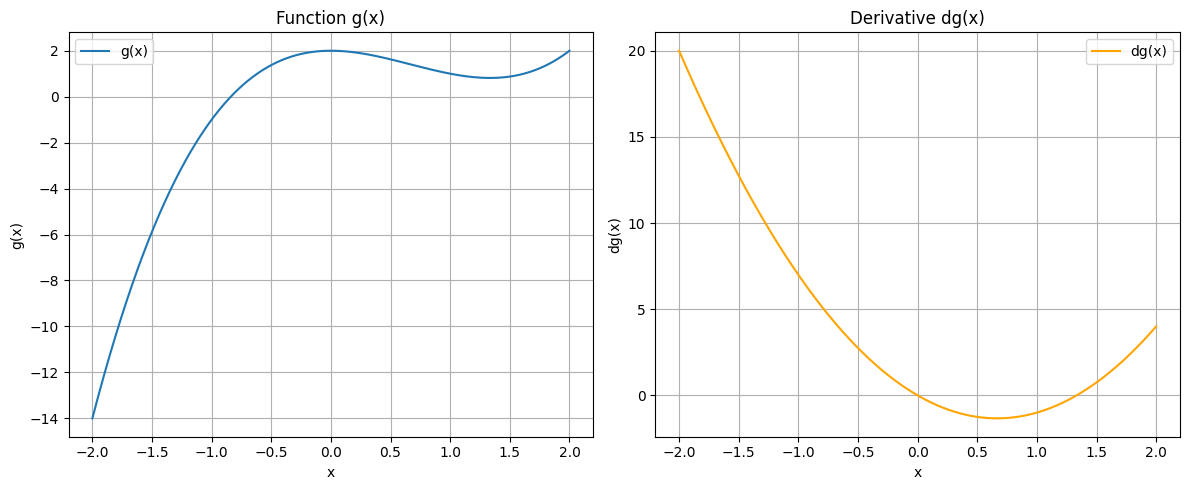

In [ ]:
import matplotlib.pyplot as plt

# Plotting g(x)
plt.figure(figsize=(12, 5))

# Plotting the function g(x)
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), label='g(x)')
plt.title('Function g(x)')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True)
plt.legend()

# Plotting the derivative dg(x)
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), label='dg(x)', color='orange')
plt.title('Derivative dg(x)')
plt.xlabel('x')
plt.ylabel('dg(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## Gradient Descent

In [ ]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [ ]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.321810121608152
Number of steps: 65


In [ ]:
from scipy.optimize import minimize_scalar

# Define the function g(x)
def g(x):
    return x**3 - 2*x**2 + 2

# Using minimize_scalar for optimization
result = minimize_scalar(g, method='bounded', bounds=(-2, 2), tol=0.0001)

local_min = result.x
print('Local min occurs at:', local_min)


Local min occurs at: -1.9999375770533399


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


In [ ]:
def dg(x):
    return np.clip(3 * x**2 - 4 * x, -1e10, 1e10)

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -52000128770.43736
Number of steps: 301


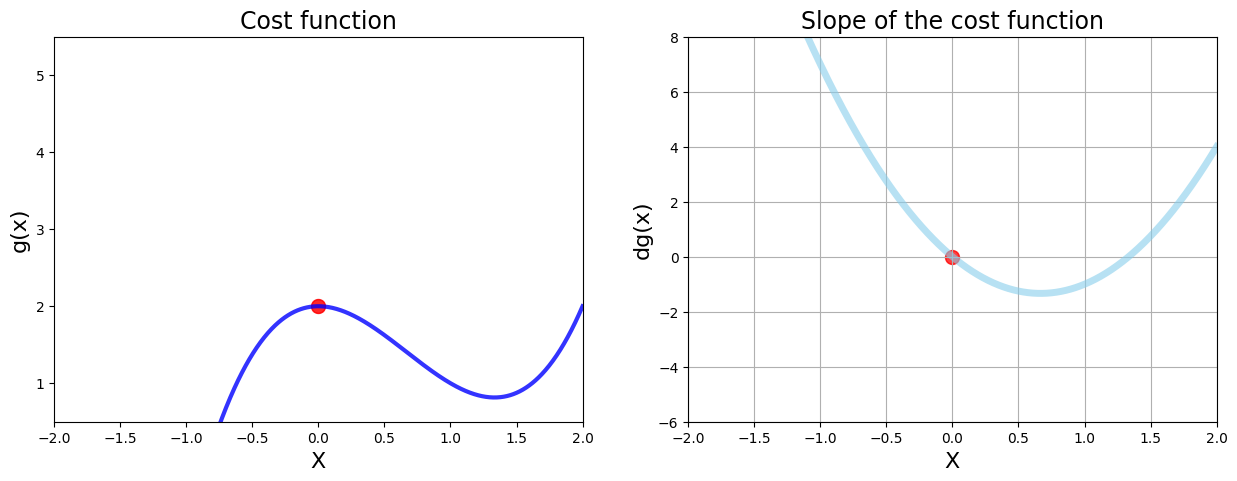

In [ ]:
# Calling gradient descent function with specified multiplier and precision
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0,
                                                 multiplier=0.01, precision=0.0001)

# Plot function and derivative and scatter plot side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()


# Example 3 - Divergence and Overflow

## $$h(x) = x^5 - 2x^4 + 2$$

In [ ]:
## TASK-4 : Code the same things as they were done for the first two examples

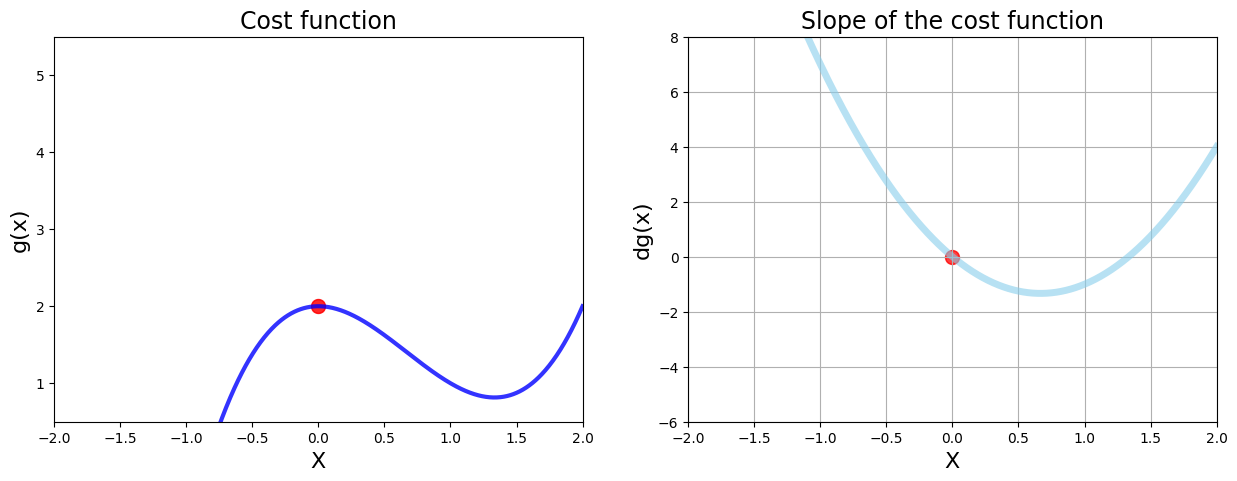

Local min using scipy: -1.9999375770533399


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the function g(x)
def g(x):
    return x**3 - 2*x**2 + 2

# Define its derivative dg(x)
def dg(x):
    return 3*x**2 - 4*x

# Define the gradient descent function
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, precision=0.0001, max_iterations=1000):
    x = initial_guess
    local_min = x
    list_x = [x]
    deriv_list = [derivative_func(x)]

    for _ in range(max_iterations):
        x = x - multiplier * derivative_func(x)
        list_x.append(x)
        deriv_list.append(derivative_func(x))

        if abs(derivative_func(x)) < precision:
            break

    return local_min, list_x, deriv_list

# Calling gradient descent function with specified multiplier and precision
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0,
                                                 multiplier=0.01, precision=0.0001)

# Plot function and derivative and scatter plot side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Using minimize_scalar for optimization
result = minimize_scalar(g, method='bounded', bounds=(-2, 2), tol=0.0001)

local_min_scipy = result.x
print('Local min using scipy:', local_min_scipy)


# The Learning Rate

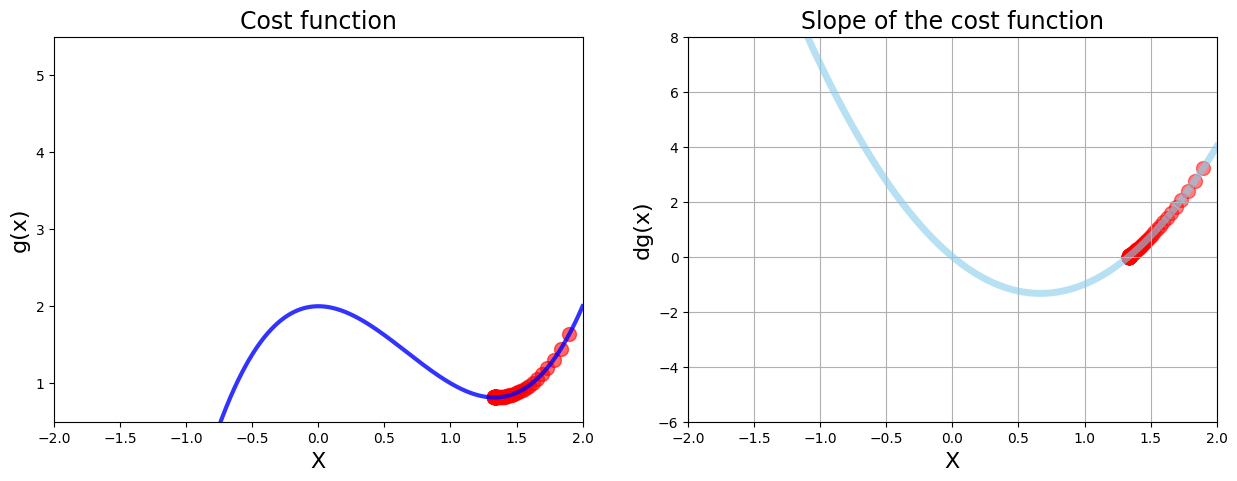

Number of steps is:  117


In [ ]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02, max_iterations=500)


# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))


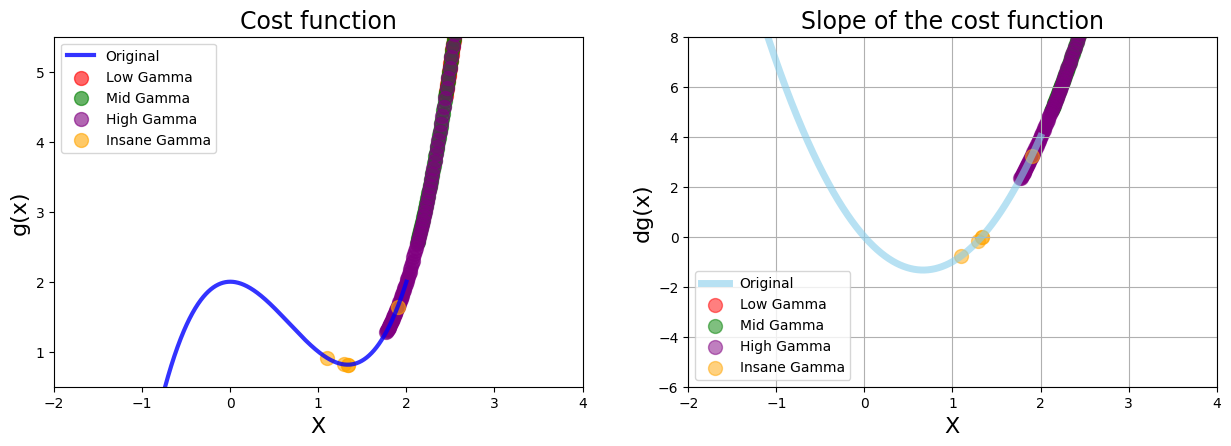

Number of steps for Low Gamma: 101
Number of steps for Mid Gamma: 101
Number of steps for High Gamma: 101
Number of steps for Insane Gamma: 5


In [ ]:
## TASK-5 : Run gradient descent 3 times
## TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.0005, precision=0.0001, max_iterations=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iterations=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                              multiplier=0.002, precision=0.0001, max_iterations=n)

insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                multiplier=0.25, precision=0.0001, max_iterations=n)

# Plot the results
plt.figure(figsize=[15, 10])

# Cost function and derivative
plt.subplot(2, 2, 1)

plt.xlim(-2, 4)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8, label='Original')
plt.scatter(low_gamma[1], g(np.array(low_gamma[1])), color='red', s=100, alpha=0.6, label='Low Gamma')
plt.scatter(mid_gamma[1], g(np.array(mid_gamma[1])), color='green', s=100, alpha=0.6, label='Mid Gamma')
plt.scatter(high_gamma[1], g(np.array(high_gamma[1])), color='purple', s=100, alpha=0.6, label='High Gamma')
plt.scatter(insane_gamma[1], g(np.array(insane_gamma[1])), color='orange', s=100, alpha=0.6, label='Insane Gamma')

plt.legend()

# Derivative
plt.subplot(2, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 4)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6, label='Original')
plt.scatter(low_gamma[1], low_gamma[2], color='red', s=100, alpha=0.5, label='Low Gamma')
plt.scatter(mid_gamma[1], mid_gamma[2], color='green', s=100, alpha=0.5, label='Mid Gamma')
plt.scatter(high_gamma[1], high_gamma[2], color='purple', s=100, alpha=0.5, label='High Gamma')
plt.scatter(insane_gamma[1], insane_gamma[2], color='orange', s=100, alpha=0.5, label='Insane Gamma')

plt.legend()

plt.show()

# Print the number of steps for each gamma
print('Number of steps for Low Gamma:', len(low_gamma[1]))
print('Number of steps for Mid Gamma:', len(mid_gamma[1]))
print('Number of steps for High Gamma:', len(high_gamma[1]))
print('Number of steps for Insane Gamma:', len(insane_gamma[1]))


In [ ]:
## TASK-7 : Plot reduction in cost for each iteration

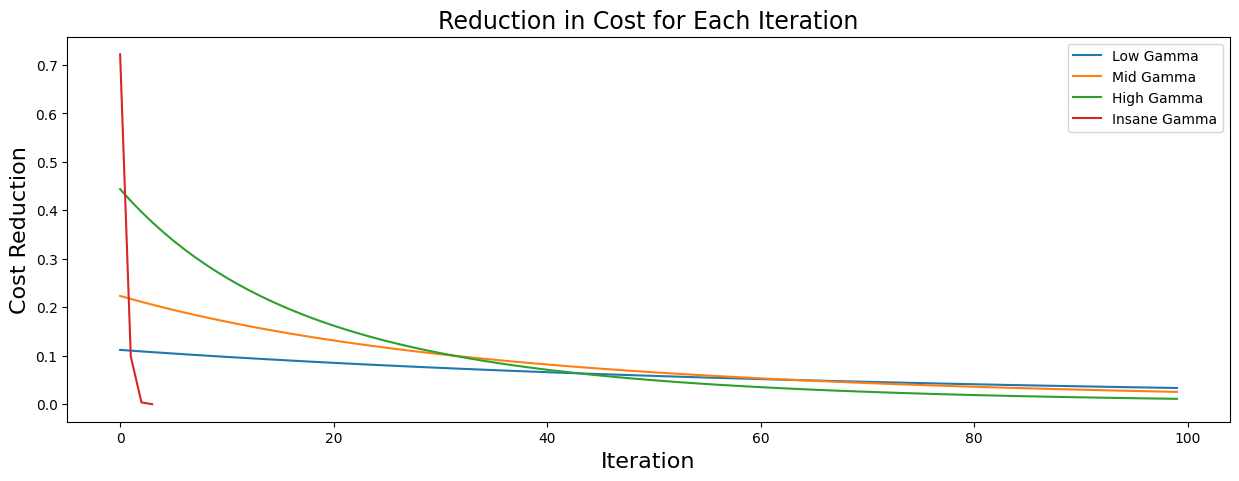

In [ ]:
##  TASK-7 ANSWER  ##
# Function to calculate cost reduction
def cost_reduction(cost_values):
    return [cost_values[i] - cost_values[i + 1] for i in range(len(cost_values) - 1)]

# Run gradient descent with different learning rates
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.0005, precision=0.0001, max_iterations=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iterations=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                              multiplier=0.002, precision=0.0001, max_iterations=n)

insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                multiplier=0.25, precision=0.0001, max_iterations=n)

# Calculate cost reduction for each iteration
reduction_low_gamma = cost_reduction([g(x) for x in low_gamma[1]])
reduction_mid_gamma = cost_reduction([g(x) for x in mid_gamma[1]])
reduction_high_gamma = cost_reduction([g(x) for x in high_gamma[1]])
reduction_insane_gamma = cost_reduction([g(x) for x in insane_gamma[1]])

# Plot the results
plt.figure(figsize=[15, 5])

plt.title('Reduction in Cost for Each Iteration', fontsize=17)
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Cost Reduction', fontsize=16)

plt.plot(reduction_low_gamma, label='Low Gamma')
plt.plot(reduction_mid_gamma, label='Mid Gamma')
plt.plot(reduction_high_gamma, label='High Gamma')
plt.plot(reduction_insane_gamma, label='Insane Gamma')

plt.legend()
plt.show()


# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [ ]:
## TASK-8 : Code the same things as they were done for the first two examples


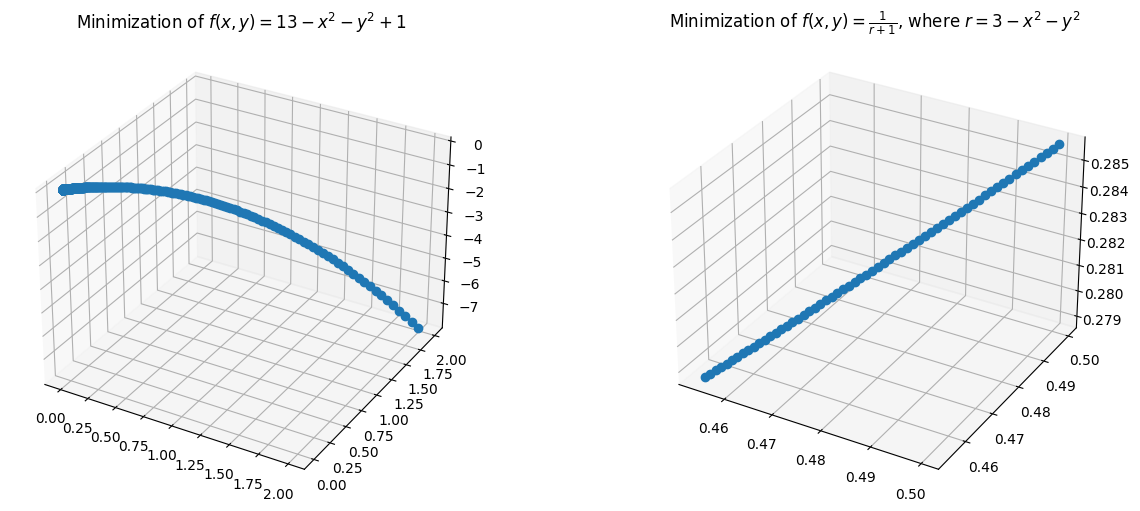

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example 1: f(x, y) = 13 - x^2 - y^2 + 1

def f1(x, y):
    return 13 - x**2 - y**2 + 1

def df1_dx(x, y):
    return -2 * x

def df1_dy(x, y):
    return -2 * y

# Example 2: f(x, y) = 1 / (r + 1), where r = 3 - x^2 - y^2

def f2(x, y):
    r = 3 - x**2 - y**2
    return 1 / (r + 1)

def df2_dx(x, y):
    r = 3 - x**2 - y**2
    return 2 * x / (r + 1)**2

def df2_dy(x, y):
    r = 3 - x**2 - y**2
    return 2 * y / (r + 1)**2

# Gradient Descent Function

def gradient_descent_3d(f, df_dx, df_dy, initial_guess, multiplier=0.01, precision=0.0001, max_iterations=1000):
    x, y = initial_guess
    local_min = np.array([x, y, f(x, y)])
    points = [local_min]

    for _ in range(max_iterations):
        x = x - multiplier * df_dx(x, y)
        y = y - multiplier * df_dy(x, y)
        z = f(x, y)

        local_min = np.array([x, y, z])
        points.append(local_min)

        if abs(f(x, y) - f(points[-2][0], points[-2][1])) < precision:
            break

    return np.array(points)

# Run gradient descent for both examples
initial_guess = [0.5, 0.5]

points1 = gradient_descent_3d(f1, df1_dx, df1_dy, initial_guess)
points2 = gradient_descent_3d(f2, df2_dx, df2_dy, initial_guess)

# Plot 3D Charts
fig = plt.figure(figsize=(15, 6))

# Example 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(points1[:, 0], points1[:, 1], points1[:, 2], marker='o')
ax1.set_title('Minimization of $f(x, y) = 13 - x^2 - y^2 + 1$')

# Example 2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(points2[:, 0], points2[:, 1], points2[:, 2], marker='o')
ax2.set_title('Minimization of $f(x, y) = \\frac{1}{r + 1}$, where $r = 3 - x^2 - y^2$')

plt.show()


In [ ]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


In [ ]:
# Assuming f is defined like this
def f(x, y):
    return 13 - x**2 - y**2 + 1

# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Assuming x_4 and y_4 are arrays of coordinates
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()




## TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.


## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = 2x\)

## $$\frac{\partial f}{\partial y} = 2y\)

#after completion#

In [ ]:
import sympy as sp

# Define the symbols
x, y = sp.symbols('x y')

# Define the function f(x, y)
f = 13 - x**2 - y**2 + 1

# Calculate partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Print the partial derivatives
print(f'Partial derivative of f with respect to x: {df_dx}')
print(f'Partial derivative of f with respect to y: {df_dy}')


In [ ]:
from sympy import symbols, diff

# Define symbols
a, b = symbols('x y')

# Define the cost function f(x, y)
f = 13 - a**2 - b**2 + 1

# Print statements
print('Our cost function f(x, y) is: ', f)
print('Partial derivative wrt x is: ', diff(f, b))
print('Value of f(x, y) at x=1.8, y=1.0 is: ',
      f.evalf(subs={a: 1.8, b: 1.0}))  # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f, a).evalf(subs={a: 1.8, b: 1.0}))


## Batch Gradient Descent with SymPy

In [ ]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guess

# Define symbols
a, b = symbols('x y')

# Define the cost function f(x, y)
f = 13 - a**2 - b**2 + 1

for n in range(max_iter):
    gradient_x = diff(f, a).evalf(subs={a: params[0], b: params[1]})
    gradient_y = diff(f, b).evalf(subs={a: params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f.evalf(subs={a: params[0], b: params[1]}))


In [ ]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

#answer#

# Partial derivative functions example 4
def fpx(x, y):
    return -2*x

def fpy(x, y):
    return -2*y




In [ ]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guess

# Define symbols
a, b = symbols('x y')

# Define the cost function f(x, y)
f = 13 - a**2 - b**2 + 1

# Partial derivative functions
def fpx(x, y):
    return -2*x

def fpy(x, y):
    return -2*y

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f.evalf(subs={a: params[0], b: params[1]}))


## Graphing 3D Gradient Descent

In [ ]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0])  # initial guess
values_array = params.reshape(1, 2)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f.evalf(subs={a: params[0], b: params[1]}))


In [ ]:
# Redefine f as a numerical function
from sympy import lambdify
f_numerical = lambdify((a, b), f, 'numpy')

# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Use the numerical function for the cost
cost_values = f_numerical(x_4, y_4)

ax.plot_surface(x_4, y_4, cost_values, cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f_numerical(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()


## For Reference, practice and play with the code below

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [ ]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

In [ ]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

In [ ]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [ ]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

In [ ]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [ ]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [ ]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [ ]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [ ]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[ij_min[0]][ij_min[1]])

## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [ ]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [ ]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()